In [1]:
from datetime import datetime

now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-15'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Enhanced Retriever 및 Chain (Query Expansion 포함)

In [4]:
# 기존 Retriever 및 Chain (원래대로 복원)
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [5]:
# Manse_tool

In [6]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_tool import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [7]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 대전출생")]})

In [8]:
print(response["messages"][-1].content)

1995년 3월 28일 대전에서 태어난 남성의 사주팔자는 다음과 같습니다.

- 년주: 을해
- 월주: 기묘
- 일주: 무오
- 시주: 무오
- 일간: 무

오행 강약 점수는 목 39점, 화 20점, 토 68점, 금 0점, 수 10점으로 토의 기운이 가장 강하고 금의 기운이 약한 편입니다.

십신 분석에 따르면 년주는 정관과 편재, 편관이 혼재되어 있고, 월주는 겁재와 정관, 일주와 시주는 정인과 겁재가 주를 이룹니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 진행됩니다.

이 사주를 바탕으로 더 구체적인 운세나 성격, 직업 적성 등에 대해 알고 싶으시면 말씀해 주세요.


In [9]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [10]:
retriever_tools = [retriever_tool]

In [11]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt) 

In [12]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [13]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남자분의 사주를 분석해 드리겠습니다.

---

### 1. 사주 구조 (천간지지 변환)

- 출생일: 1995년 3월 28일 (양력 기준)
- 성별: 남자
- 출생시간: 미지정 (시간을 알려주시면 정확한 시주(時柱)까지 계산 가능합니다)

#### 1) 연주 (년柱)
- 1995년은 을해년(乙亥年)입니다.
  - 천간: 乙 (을목)
  - 지지: 亥 (해수)

#### 2) 월주 (월柱)
- 3월은 음력 2월 또는 3월에 따라 다르지만, 양력 3월 28일은 음력 2월 29일 또는 3월 초일 가능성이 큽니다.
- 1995년 3월 28일의 월주는 을묘월(乙卯月)입니다.
  - 천간: 乙 (을목)
  - 지지: 卯 (묘목)

#### 3) 일주 (일柱)
- 1995년 3월 28일의 일주는 병진일(丙辰日)입니다.
  - 천간: 丙 (병화)
  - 지지: 辰 (진토)

#### 4) 시주 (시柱)
- 출생시간이 없으므로 기본적으로 미지정 상태입니다.
- 출생시간을 알려주시면 12지지에 따른 시주를 정확히 계산해 드리겠습니다.

---

### 2. 오행(五行) 분석

#### 1) 사주 8글자 (천간 4개 + 지지 4개)

| 구분 | 천간 | 지지 |
|-------|-------|-------|
| 연주 | 乙 (을목) | 亥 (해수) |
| 월주 | 乙 (을목) | 卯 (묘목) |
| 일주 | 丙 (병화) | 辰 (진토) |
| 시주 | 미지정 | 미지정 |

총 6글자(시주 미지정) 기준으로 오행 분포를 계산하겠습니다.

#### 2) 오행 분류표

- 목(木): 甲, 乙, 寅, 卯
- 화(火): 丙, 丁, 巳, 午
- 토(土): 戊, 己, 辰, 戌, 丑, 未
- 금(金): 庚, 辛, 申, 酉
- 수(水): 壬, 癸, 子, 亥

#### 3) 각 글자별 오행 점수

| 글자 | 오행 | 점수 |
|-------|-------|-------|
| 乙 (연간) | 목 | 1 |
| 亥 (연지) | 수 | 1 |
| 乙 (월간) 

In [14]:
# Query Expansion Agent (manse_tool처럼 간단하게)
from query_expansion_agent import get_query_expansion_agent

query_expansion_agent = get_query_expansion_agent()


In [15]:
# Query Expansion Agent 올바른 사용법 테스트
response = query_expansion_agent.invoke({"messages": [("user", "1995년 3월 28일 남자 사주")]})
print(response["messages"][-1].content)


확장된 영어 질문은 다음과 같습니다:

"Could you provide a birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am interested in understanding the implications of his birth date on his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny."

이 질문을 사용하여 문서 검색을 진행하실 수 있습니다. 추가적인 도움이 필요하시면 말씀해 주세요!


In [16]:
from langchain_community.utilities.duckduckgo_search import DuckDuckGoSearchAPIWrapper

In [49]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "정관이 뭐야?")]}
result = query_expansion_node(test_state)

{'messages': [('user', '정관이 뭐야?')],
 'expanded_query': 'What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.',
 'original_query': "('user', '정관이 뭐야?')",
 'expansion_result': '\n[Query Expansion 결과]\n원본 질문: (\'user\', \'정관이 뭐야?\')\n확장된 영어 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.\n\n검색을 위해 확장된 쿼리를 사용합니다.\n'}

In [50]:
print(result)

{'messages': [('user', '정관이 뭐야?')], 'expanded_query': 'What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.', 'original_query': "('user', '정관이 뭐야?')", 'expansion_result': '\n[Query Expansion 결과]\n원본 질문: (\'user\', \'정관이 뭐야?\')\n확장된 영어 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one\'s birth chart analysis, particularly in relation to career and authority.\n\n검색을 위해 확장된 쿼리를 사용합니다.\n'}


In [18]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "1995년 3월 28일 남자 사주")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")

노드 테스트 결과:
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 영어 질문: Could you provide a detailed analysis of the Four Pillars of Destiny (Ba Zi) for a male born on March 28, 1995? I am interested in understanding how his birth chart influences his personality, career prospects, and overall life path. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.

검색을 위해 확장된 쿼리를 사용합니다.



In [19]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [21]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults
from langchain_core.documents import Document

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
    
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [22]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [23]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [24]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [25]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='e93bccdb-f72a-4244-ab9b-4be916906173'),
  AIMessage(content="사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각의 기둥은 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.\n\n'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.\n\n사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 개인의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 좋아하고, 화가 강하면 열정적이고 활동적인 성향을 가진다고 해석합니다.\n\n요약하면, 사주오행은 사주(생년월일시)와 오행(목, 화, 토, 금, 수)의 조합을 통해 개인의 운명과 성격을 해석하는 동양의 전통적인 방법입니다. 더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 344, 'prompt_tokens': 181, 'total_tokens': 525, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tok

In [26]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각의 기둥은 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.

'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.

사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 개인의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 좋아하고, 화가 강하면 열정적이고 활동적인 성향을 가진다고 해석합니다.

요약하면, 사주오행은 사주(생년월일시)와 오행(목, 화, 토, 금, 수)의 조합을 통해 개인의 운명과 성격을 해석하는 동양의 전통적인 방법입니다. 더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!


In [28]:
# GeneralQA Tool
from langchain.tools import  tool
from langchain_google_genai import ChatGoogleGenerativeAI
google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

@tool
def general_qa_tool(query: str) -> str:
    """
    일반적인 질문이나 상식적인 내용에 대해 답변합니다. 사주와 관련 없는 모든 질문에 사용할 수 있습니다.
    """
    google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return google_llm.invoke(query)

In [29]:
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_qa_tools = [general_qa_tool]

prompt = "일반적인 질문이나 상식적인 내용에 대해 답변합니다."

general_qa_agent = create_react_agent(llm, tools=general_qa_tools, prompt=prompt)

# Agent node 생성

In [30]:
from langchain_core.messages import HumanMessage

# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

# node 생성

In [31]:
import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")
general_qa_agent_node = functools.partial(agent_node, agent=general_qa_agent, name="GeneralQA")

# 노드 실험

In [32]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남자분의 사주팔자를 분석해보면 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행의 강약은 토가 가장 강하고, 목과 화가 그 다음이며 금은 거의 없는 편입니다.\n\n십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.\n\n대운은 5세부터 10년 단위로 무인, 정축, 병자, 을해 순으로 변화하며 현재 25세부터 2029년까지 병자 대운에 해당합니다.\n\n이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 목과 화의 기운이 있어 활발하고 창의적인 면도 있습니다. 금의 기운이 약해 결단력이나 변화에 대한 적응력이 다소 부족할 수 있으니 보완하는 노력이 필요합니다.\n\n더 구체적인 운세나 조언이 필요하시면 알려주세요.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [33]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content='안녕하세요. 1995년 3월 28일 남자, 12시 30분 출생에 대한 사주 분석을 진행하겠습니다.\n\n---\n\n### 1. 사주 구조 (천간지지 변환)\n\n- 출생일: 1995년 3월 28일 (양력 기준)\n- 출생시간: 12시 30분 → 지지 시간대: 오시 (午時, 11:30~13:30)\n\n#### 1) 연주 (년주)\n- 1995년은 을해년(乙亥年)입니다.\n  - 천간: 을(乙)\n  - 지지: 해(亥)\n\n#### 2) 월주 (월간, 월지)\n- 3월 28일은 음력 2월 28일에 해당하며, 3월은 보통 인월(寅月) 또는 묘월(卯月)로 변환됩니다.\n- 1995년 3월 28일은 양력 기준으로 을묘월(乙卯月)입니다.\n  - 천간: 을(乙)\n  - 지지: 묘(卯)\n\n#### 3) 일주 (일간, 일지)\n- 1995년 3월 28일의 일주는 병진일(丙辰日)입니다.\n  - 천간: 병(丙)\n  - 지지: 진(辰)\n\n#### 4) 시주 (시간)\n- 12시 30분은 오시(午時)입니다.\n- 시주는 오시의 천간을 계산해야 합니다.\n- 시간 천간은 일간에 따라 달라지는데, 병일(丙日)의 오시(午時) 시간 천간은 정(丁)입니다.\n- 따라서 시주는 정오(丁午)입니다.\n  - 천간: 정(丁)\n  - 지지: 오(午)\n\n---\n\n### 최종 사주 구조 (천간지지 8자)\n\n| 구분 | 천간 | 지지 |\n|------|------|------|\n| 연주 | 乙   | 亥   |\n| 월주 | 乙   | 卯   |\n| 일주 | 丙   | 辰   |\n| 시주 | 丁   | 午   |\n\n---\n\n### 2. 오행(五行) 분석\n\n#### 1) 천간지지 → 오행 매핑\n\n| 오행 | 해당 천간/지지 문자 |\n|-------|--------------------|\n| 목(木) | 甲, 乙, 寅, 卯     |\n| 화(火) | 丙, 丁, 巳, 午     |\n| 

In [34]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)


{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 다섯 가지 기본 요소 중 하나로, '목(木), 화(火), 토(土), 금(金), 수(水)' 중에서 '화(火)'에 해당합니다. 불은 다음과 같은 의미와 특성을 가집니다.\n\n1. 상징과 의미:\n   - 불은 열정, 에너지, 활력, 빛, 따뜻함을 상징합니다.\n   - 밝고 강렬한 성질로, 사람의 성격에서는 적극적이고 활발하며 리더십이 강한 면을 나타냅니다.\n   - 또한 변화와 변혁, 창조적인 힘을 의미하기도 합니다.\n\n2. 계절과 방향:\n   - 불은 여름과 남쪽을 상징합니다.\n   - 여름의 뜨거운 태양과 같은 기운을 지니고 있습니다.\n\n3. 성격적 특성:\n   - 불의 기운이 강한 사람은 열정적이고 사교적이며, 표현력이 뛰어나고 활발합니다.\n   - 때로는 급하고 다혈질적인 면도 있을 수 있습니다.\n\n4. 상생과 상극 관계:\n   - 상생: 불은 목(木)을 태워 성장시키므로, 목이 불을 돕는 관계입니다.\n   - 상극: 불은 금(金)을 녹이므로, 불과 금은 상극 관계입니다.\n\n사주에서 불의 위치와 세기, 다른 오행과의 조합에 따라 개인의 성격, 운세, 건강 등에 다양한 영향을 미칩니다. 더 구체적인 사주 분석이 필요하면 태어난 연월일시를 알려주시면 도움을 드릴 수 있습니다.", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [35]:
# GeneralQA 테스트
general_qa_message = general_qa_agent_node(
    {
        "messages": [
            HumanMessage(content="파이썬에서 리스트와 튜플의 차이점?")
        ]
    }
)
print(general_qa_message)

{'messages': [HumanMessage(content="파이썬에서 리스트(List)와 튜플(Tuple)은 모두 여러 개의 아이템을 담을 수 있는 시퀀스 자료형이지만, 몇 가지 중요한 차이점이 있습니다.\n\n**1. 가변성 (Mutability):**\n- **리스트 (List):** 가변(Mutable)합니다. 즉, 리스트를 생성한 후에 요소를 추가, 삭제, 변경할 수 있습니다.\n- **튜플 (Tuple):** 불변(Immutable)합니다. 튜플을 생성한 후에는 요소를 변경할 수 없습니다.\n\n**2. 문법:**\n- **리스트:** 대괄호 `[]`를 사용하여 정의합니다. 예: `my_list = [1, 2, 3]`\n- **튜플:** 소괄호 `()`를 사용하여 정의합니다. 예: `my_tuple = (1, 2, 3)`  요소가 하나인 튜플은 `(1,)`처럼 쉼표를 붙여야 합니다.\n\n**3. 성능:**\n- 일반적으로 튜플은 리스트보다 약간 더 빠릅니다. 튜플은 불변하기 때문에 파이썬 인터프리터가 최적화를 더 쉽게 수행할 수 있습니다.\n- 메모리 사용량도 튜플이 리스트보다 약간 더 효율적입니다.\n\n**4. 사용 사례:**\n- **리스트:** 데이터가 변경될 가능성이 있는 경우, 순서가 중요하고 요소를 추가/삭제/수정해야 하는 경우에 사용합니다. 예를 들어, 사용자 목록, 장바구니 목록, 로그 기록 등이 있습니다.\n- **튜플:** 데이터가 변경되지 않아야 하는 경우, 순서가 중요하고 읽기 전용으로 사용해야 하는 경우에 사용합니다. 예를 들어, 좌표 (x, y), RGB 색상 (red, green, blue), 데이터베이스 레코드 등이 있습니다. 함수에서 여러 값을 반환할 때 튜플을 사용하는 것이 일반적입니다.\n\n**5. 메서드:**\n- 리스트는 요소를 변경하는 메서드 (예: `append`, `insert`, `remove`, `sort`)를 제공합니다.\n- 튜플은 요소를 변경하는 메서드를 제공하지 않습니다. 대신, `cou

# Agent Supervisor 생성

In [106]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의 (QueryExpansion, GeneralQA 추가)
members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["Barricade"] + members

# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]


In [107]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n"
    "- GeneralQA: For answering general questions that are NOT related to Saju at all (e.g., programming, science, general knowledge, weather, etc.).\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require document search, call WebTool.\n"
    "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering Barricade.\n"
    "3. For completely non-Saju questions, use GeneralQA directly.\n"
    "3. After all needed steps are complete, respond with Barricade.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)


# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we Barricade? Select one of: {options}",
            # "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [115]:
# 답번 적절성 평가 노드: 바리게이트
from langchain_openai import ChatOpenAI

def barricade_node(state):
    # 마지막 메시지(답변)와 원본 질문 추출
    messages = state["messages"]
    user_message = None
    answer_message = None
    if messages:
        user_message = messages[0].content
        answer_message = messages[-1].content

    # LLM 프롬프트
    prompt = f"""아래는 사용자의 질문과 그에 대한 답변입니다.
        질문: {user_message}
        답변: {answer_message}

        이 답변이 질문에 적절하게 답하고 있으면 'FINISH', 적절하지 않으면 'QueryExpansion'만 출력하세요."""

    llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
    result = llm.invoke(prompt)
    if "FINISH" in result.content:
        return {"next": "FINISH", "messages": messages}
    else:
        return {"next": "QueryExpansion", "messages": messages}

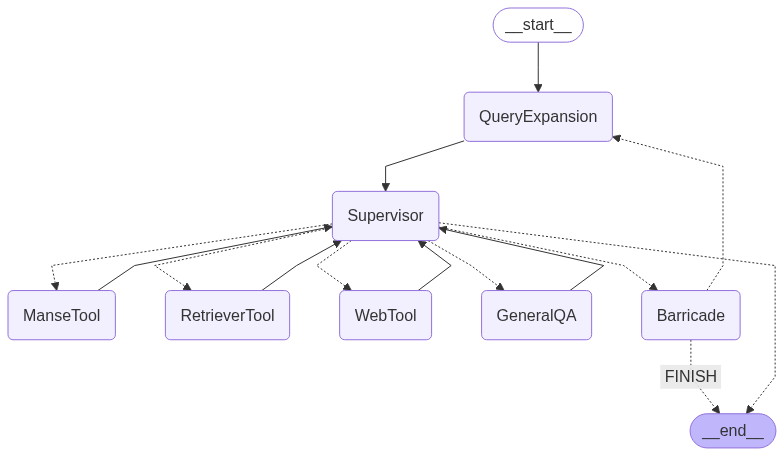

In [116]:
graph

In [117]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [118]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow2 = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]
workflow2.add_node("ManseTool", manse_tool_agent_node)
workflow2.add_node("QueryExpansion", query_expansion_node)  # Query Expansion 노드 추가
workflow2.add_node("RetrieverTool", retriever_tool_agent_node)  # 기존 Retriever 사용
workflow2.add_node("WebTool", web_tool_agent_node)
workflow2.add_node("GeneralQA", general_qa_agent_node)  # GeneralQA 노드 추가
workflow2.add_node("Supervisor", supervisor_agent)
workflow2.add_node("Barricade", barricade_node)


# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow2.add_edge(member, "Barricade")

# 조건부 엣지 추가
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END

def get_next(state):
    return state["next"]

# Supervisor 노드에서 조건부 엣지 추가
workflow2.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
workflow2.add_edge(START, "QueryExpansion")
workflow2.add_edge("QueryExpansion", "Supervisor")

# Barricade → Supervisor(적절) / QueryExpansion(부적절) 조건부 엣지
def barricade_next(state):
    return state["next"]

workflow2.add_conditional_edges("Barricade", barricade_next, {
    "Supervisor": "Supervisor",
    "QueryExpansion": "QueryExpansion"
})

# 그래프 컴파일
graph2 = workflow2.compile(checkpointer=MemorySaver())


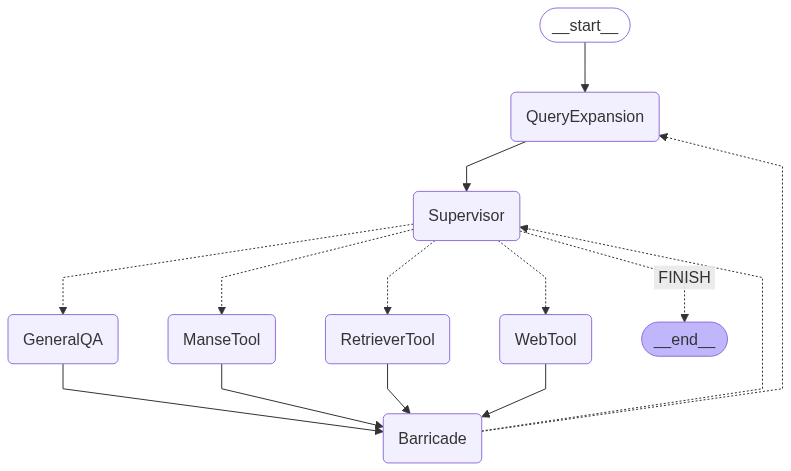

In [119]:
graph2

In [120]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow = StateGraph(AgentState)

# 멤버(agent) 노드
workflow.add_node("ManseTool", manse_tool_agent_node)
workflow.add_node("RetrieverTool", retriever_tool_agent_node)
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("GeneralQA", general_qa_agent_node)
workflow.add_node("QueryExpansion", query_expansion_node)

# Supervisor 노드
workflow.add_node("Supervisor", supervisor_agent)

# Barricade(적절성 평가) 노드
workflow.add_node("Barricade", barricade_node)

members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 시작점
workflow.add_edge(START, "QueryExpansion")
workflow.add_edge("QueryExpansion", "Supervisor")

# Supervisor → (각 툴 or FINISH)
conditional_map = {k: k for k in members}  # 각 툴 이름
conditional_map["Barricade"] = "Barricade"    # FINISH일 때만 Barricade로

def get_next(state):
    return state["next"]

workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 각 툴 → Supervisor
for member in members:
    workflow.add_edge(member, "Supervisor")

# Barricade → END(적절) / QueryExpansion(부적절)
def barricade_next(state):
    return state["next"]

workflow.add_conditional_edges("Barricade", barricade_next, {
    "FINISH": END,
    "QueryExpansion": "QueryExpansion"
})

graph = workflow.compile(checkpointer=MemorySaver())

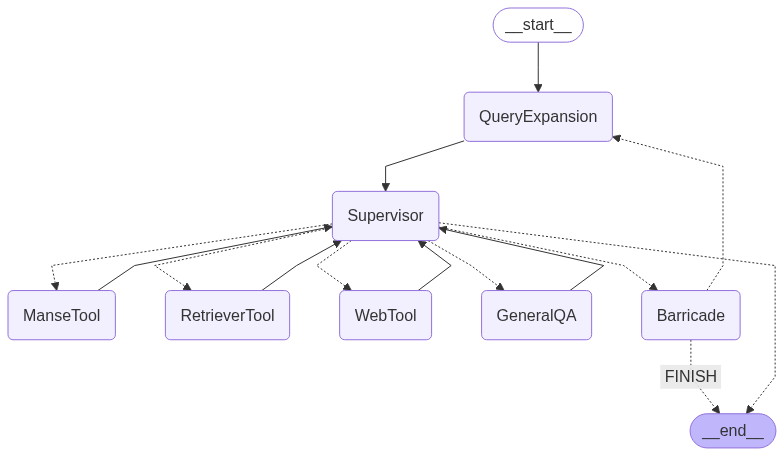

In [121]:
graph

In [122]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=30, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a fortune reading for a male born on March 28, 1995, at 12:30 PM? I am interested in a detailed analysis of his Four Pillars of Destiny (Ba Zi) and how they may influence his personality, career prospects, and overall life path. Please include insights based on his birth chart analysis and any significant elements or interactions present in his chart.1995년 3월 28일 남자, 12시 30분 출생 운세봐줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정축 (2010년 ~ 2019년)
25

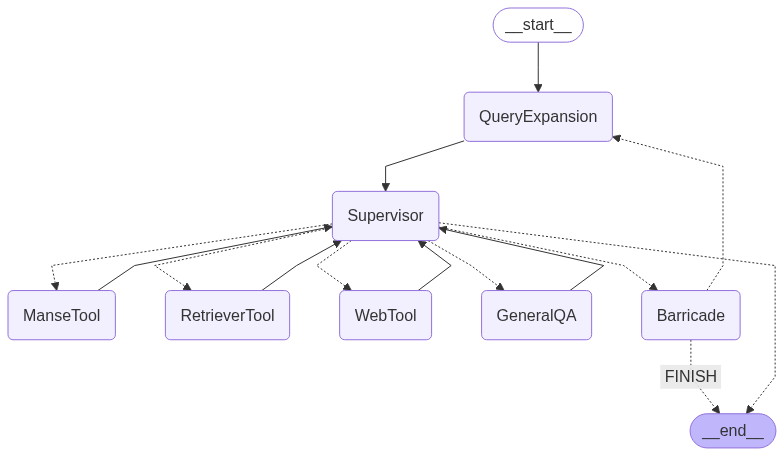

In [ ]:
graph

In [42]:
# 추가질문 -> 바로 retriever tool로 들어갔다

In [43]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운분석 자세히 해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a detailed analysis of the Major Luck Cycle (Daewoon) and the Annual Luck Cycle (Seewoon) in relation to my Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding how these cycles influence my life path and opportunities based on my birth chart.대운과 세운분석 자세히 해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 대운과 세운(연운) 분석을 자세히 안내해 드리겠습니다.

---

## 1. 대운(大運) 분석

### 대운 시작 나이 및 진행 방향

- 출생 월(3월, 양력) 기준 절기는 경칩(3월 5일경) 이후이므로, 남성은 대운을 앞으로 진행합니다.
- 대운 시작 나이는 5세부터 시작합니다.

### 대운 목록 및 시기

| 대운 시작 나이 | 대운 천간지지 | 오행 특징 및 해석                      |
|----------------|---------------|-------------------------------------|
| 5세 ~ 14세     | 무인(戊寅)    | 토(土)와 목(木) 기운 강화, 성장기 기반 형성 |
| 15세 ~ 24세    | 정축(丁丑)    | 화(火)와 토(土) 기운, 현실적이고 활동적 시기 |
| 25세 ~ 34세    | 병자(

In [44]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="난 미래에 대한 대운과 세운분석이 궁금해"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
I am curious about the analysis of my luck cycles (Da Yun) and annual luck (Se Yun) in relation to my Four Pillars of Destiny (Ba Zi). Could you provide insights into how these cycles will influence my future based on my birth chart analysis?난 미래에 대한 대운과 세운분석이 궁금해
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 미래 대운과 세운(연운) 분석을 자세히 안내해 드리겠습니다.

---

## 1. 미래 대운(大運) 분석

### 대운 진행 및 시작 나이

- 출생 월(3월, 양력) 기준 절기는 경칩(3월 5일경) 이후로, 남성은 대운을 앞으로 진행합니다.
- 대운은 5세부터 시작하며, 10년 단위로 변화합니다.

### 미래 대운 목록 및 시기

| 대운 시작 나이 | 대운 천간지지 | 오행 특징 및 해석                      |
|----------------|---------------|-------------------------------------|
| 35세 ~ 44세    | 을해(乙亥)    | 목(木)과 수(水) 기운 강화, 성장과 지혜의 시기 |
| 45세 ~ 54세    | 갑술(甲戌)    | 목(木)과 토(土) 기운, 안정과 발전의 시기 |
| 55세 ~ 64세    | 계유(癸酉)    | 수(水)와 금(金) 기운, 금 기

In [45]:
# Enhanced Retriever with Query Expansion 테스트
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 한글 사주 질문으로 테스트 (Query Expansion이 작동할 질문)
inputs = {
    "messages": [
        HumanMessage(
            content="정관이 뭐야? 상세히 설명해줘"
        )
    ],
}


# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What is the concept of "正官" (Zheng Guan) in the context of the Four Pillars of Destiny (Ba Zi)? Please provide a detailed explanation, including its significance in a birth chart analysis and how it influences an individual's personality, career, and relationships. Additionally, could you elaborate on how Zheng Guan interacts with other elements in the birth chart?정관이 뭐야? 상세히 설명해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
"정관"은 여러 가지 의미가 있을 수 있지만, 일반적으로 두 가지 주요 의미로 사용됩니다.

1. 법률 및 기업 관련 의미:
   - 정관(定款)은 회사나 단체가 설립될 때 그 조직의 목적, 조직 구성, 운영 방식 등을 규정한 기본 규칙이나 헌장입니다.
   - 회사의 정관은 회사의 설립 목적, 자본금, 주식의 종류와 발행, 이사회 구성, 주주총회 절차, 이익 배당 방법 등 회사 운영에 관한 중요한 사항들을 명시합니다.
   - 정관은 회사의 내부 규범으로서 법적 효력을 가지며, 회사 운영의 근간이 됩니다.
   - 정관은 주로 주식회사, 비영리 단체, 협동조합 등에서 작성하며, 법률에 따라 공증이나 등기가 필요할 수 있습니다.

2. 사주명리학에서의 의미:
   - 사주명리학에서 "정관"은 십신(十神) 

In [46]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

사주의 개념에 대해서 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 예측하는 체계입니다. '사주'라는 말은 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시 각각을 한 기둥으로 보아 총 네 기둥으로 구성됩니다.

각 기둥은 천간(10간)과 지지(12지)라는 두 가지 요소로 이루어져 있으며, 이들이 조합되어 개인의 사주팔자(八字)를 만듭니다. 사주팔자는 총 8글자로 구성되는데, 이를 통해 오행(목, 화, 토, 금, 수)의 균형과 상호작용을 분석하여 그 사람의 성격, 건강, 직업, 인간관계, 운세 등을 해석합니다.

사주는 단순한 운세 예측을 넘어서, 자신의 성향과 인생의 흐름을 이해하고 조화롭게 살아가기 위한 지침으로도 활용됩니다. 

더 구체적인 내용이나 사주팔자 해석 방법, 오행의 의미 등에 대해 궁금하시면 알려주세요!

🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
===============================

In [47]:
# GeneralQA 도구 테스트 - 일반 질문
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 일반 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you explain the differences between a dictionary and a list in Python, particularly in the context of data structures used for organizing information? Additionally, I am interested in understanding how these concepts might relate to the analysis of a birth chart in Four Pillars of Destiny (Ba Zi), where different elements and their relationships can be represented in various formats.파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
파이썬에서 딕셔너리와 리스트는 데이터를 저장하고 관리하는 데 사용되는 기본적인 자료 구조이지만, 몇 가지 중요한 차이점이 있습니다.

**1. 데이터 접근 방식:**

*   **리스트 (List):** 리스트는 순서가 있는 요소들의 모음입니다. 각 요소는 **인덱스**를 통해 접근합니다. 인덱스는 0부터 시작하는 정수이며, 요소의 위치를 나타냅니다. 예를 들어, `my_list[0]`은 리스트의 첫 번째 요소를 가져옵니다. 리스트는 순서가 중요하고, 특정 위치의 요소에 접근해야 할 때 유용합니다.

*   **딕셔너리 (